In [5]:
import sys
sys.path.append("../")

In [6]:
from scipy import special
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from delay.delay import *
import delay.model as model

import delay.calculator as calc
from delay.strategy import fA_HardInterval, fB_HardInterval, showIntervalFunctions
from delay.simulation import Simulation, FunctionType
from delay.value import calculateValue

In [7]:
N=100

In [8]:
def printNice(h, digits=5):
    h = [round(x, ndigits=digits) for x in h]
    N = int(len(h))-1
    for i in range(int(len(h)/10)):
        print(int(i*10-N/2), ': ', h[slice(i*10, (i+1)*10)])

In [5]:
%timeit
simulation = Simulation(FunctionType.HARD_INTERVAL, (10, 0), calculateValue, calc.linear(N=100, w=0.99))
simulation.setN(100)
simulation.setConv(100)
simulation.setDuration(10000000) # 10^7
simulation.setD(20)
simulation.run()

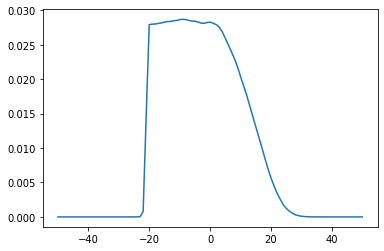

-50 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
-40 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
-30 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4e-05, 0.00078, 0.01466]
-20 :  [0.02792, 0.028, 0.02801, 0.0281, 0.02817, 0.02828, 0.02838, 0.02838, 0.02847, 0.02854]
-10 :  [0.02864, 0.0287, 0.02866, 0.02854, 0.02843, 0.02842, 0.02831, 0.02816, 0.02811, 0.02823]
0 :  [0.02828, 0.02813, 0.02792, 0.02756, 0.02687, 0.02595, 0.02496, 0.02398, 0.023, 0.02178]
10 :  [0.0204, 0.01905, 0.0177, 0.01616, 0.01462, 0.0131, 0.0116, 0.01008, 0.00852, 0.00702]
20 :  [0.00568, 0.0045, 0.00346, 0.00258, 0.00181, 0.00126, 0.00084, 0.00055, 0.00032, 0.00019]
30 :  [0.0001, 5e-05, 2e-05, 1e-05, 1e-05, 0.0, 0.0, 0.0, 0.0, 0.0]
40 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [9]:
h = np.histogram(simulation.x, bins=np.linspace(-N/2-0.5, N/2+0.5, N+2), density=True)[0].tolist()
model.plot(h);
printNice(h)

µ =  -2.808321524048848


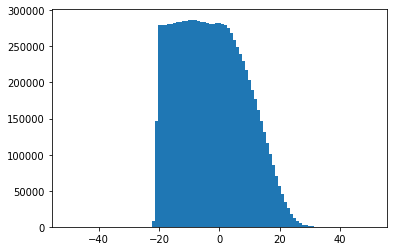

In [10]:
simulation.plotOnlyHistogram()

In [14]:
from importlib import reload
reload(model);

In [20]:
r = model.initialRightProbabilities(100, 20, 0.01)
stationary = model.probabilities2Stationary(r)
model.rightProbabilitiesAccurate(stationary, r, epsilon=0.01, d=20, tau=10)

[0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.05685278324568585,
 0.05685278324568585,
 0.0120904381189874,
 0.012090438118987398,
 0.010055786067773834,
 0.010055786067773827,
 0.010000980625316897,
 0.010000980625316897,
 0.010000011842243165,
 0.010000104148315099,
 0.01000000099188263,
 0.010000006627039018,
 0.010000000045455327,
 0.010000000072786987,
 0.01000000000030352,
 0.010000000000339704,
 0.010000000000000816,
 0.010000000000000878,
 0.010000000000000002,
 0.010000000000000002,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01]

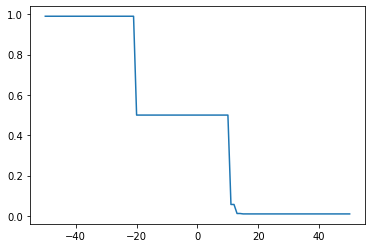

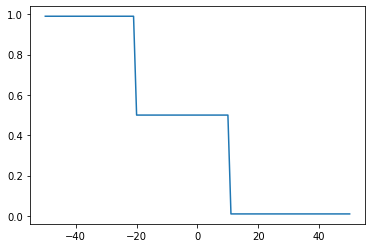

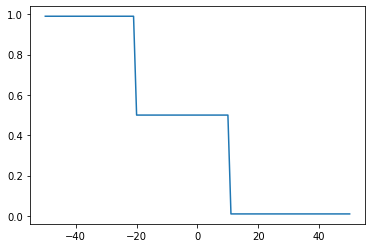

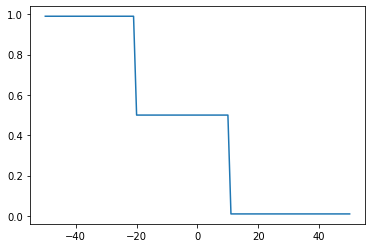

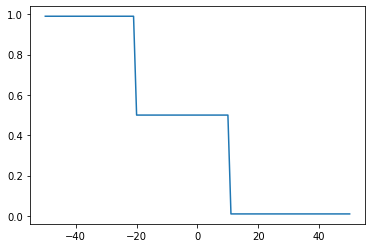

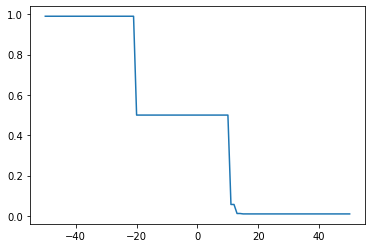

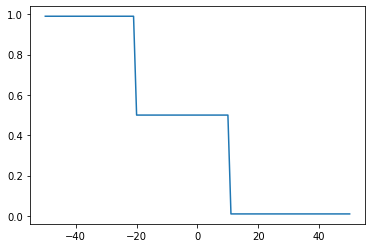

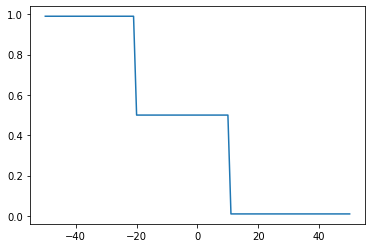

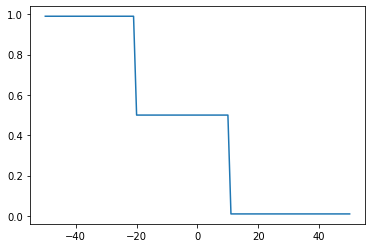

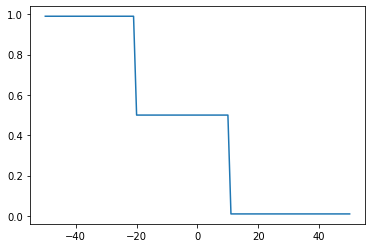

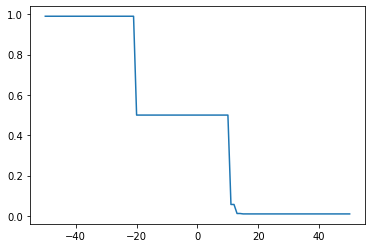

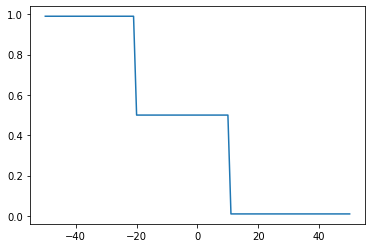

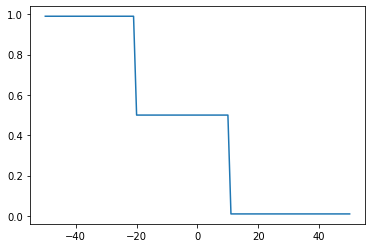

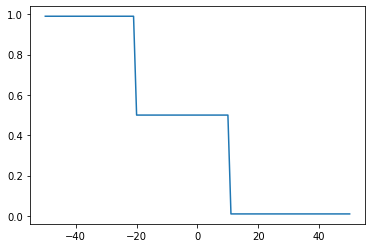

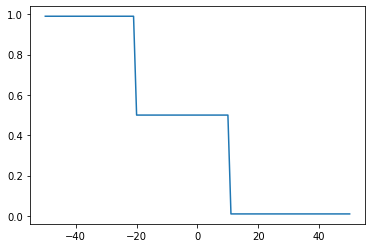

KeyboardInterrupt: 

In [18]:
r = model.initialRightProbabilities(100, 20, 0.01)
for _ in range(10):
    stationary = model.probabilities2Stationary(r)
    for __ in range(5):
        r = model.rightProbabilitiesAccurate(stationary, r, epsilon=0.01, d=20, tau=10)
        model.plot(r)

-50 :  [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99]
-40 :  [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99]
-30 :  [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99]
-20 :  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
-10 :  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
0 :  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
10 :  [0.5, 0.01001, 0.01001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
20 :  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
30 :  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
40 :  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]


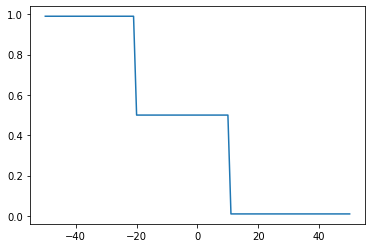

In [17]:
printNice(r)
model.plot(r);

-50 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
-40 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
-30 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00016, 0.01575]
-20 :  [0.03118, 0.03118, 0.03118, 0.03118, 0.03118, 0.03118, 0.03118, 0.03118, 0.03118, 0.03118]
-10 :  [0.03118, 0.03118, 0.03118, 0.03118, 0.03118, 0.03118, 0.03118, 0.03118, 0.03118, 0.03118]
0 :  [0.03118, 0.03118, 0.03118, 0.03118, 0.03118, 0.03118, 0.03118, 0.03118, 0.03118, 0.03118]
10 :  [0.03118, 0.01653, 0.001, 6e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
20 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
30 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
40 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


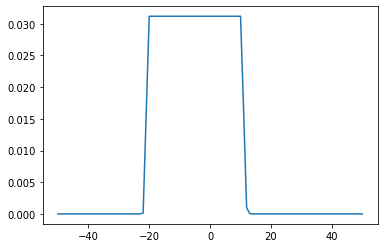

In [24]:
stationary = model.probabilities2Stationary(r)
printNice(stationary)
model.plot(stationary)

In [56]:
y = np.linspace(-N/2, N/2, num=N+1)
np.dot(stationary, y)

-1.2358969220056093